## Iris Final Python Project 
Martinez Casas, Rodriguez Larreta, Vallejo Garnica

Import Libraries

In [25]:
pip freeze

Note: you may need to restart the kernel to use updated packages.alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.11.0
anaconda-navigator==2.3.1
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid @ file:///C:/Windows/TEMP/abs_b0dtxgpicv/croots/recipe/astroid_1659023126745/work
astropy @ file:///C:/ci/astropy_1657719656942/work
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file://

In [26]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay,f1_score,recall_score,precision_score
from tkinter import* # for GUI
from PIL import Image, ImageTk
from sklearn.preprocessing import LabelEncoder
import tkinter as tk
from PIL import Image

Load the dataset from UCI

In [76]:
csv_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width","Species"]
df =  pd.read_csv(csv_url, names = col_names)

In [77]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Missings

In [78]:
df.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

Check if it is balanced

In [79]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

It is balanced

Correlation

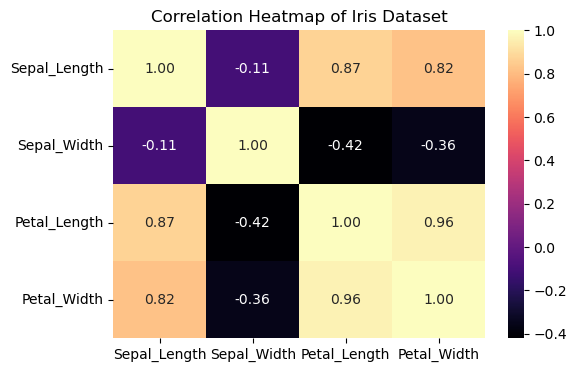

In [80]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="magma",ax=ax) # 2 decimals
ax.set_title("Correlation Heatmap of Iris Dataset")
plt.show()

In [81]:
print(df.groupby("Species").mean())

                 Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


Pairplot

<Figure size 600x600 with 0 Axes>

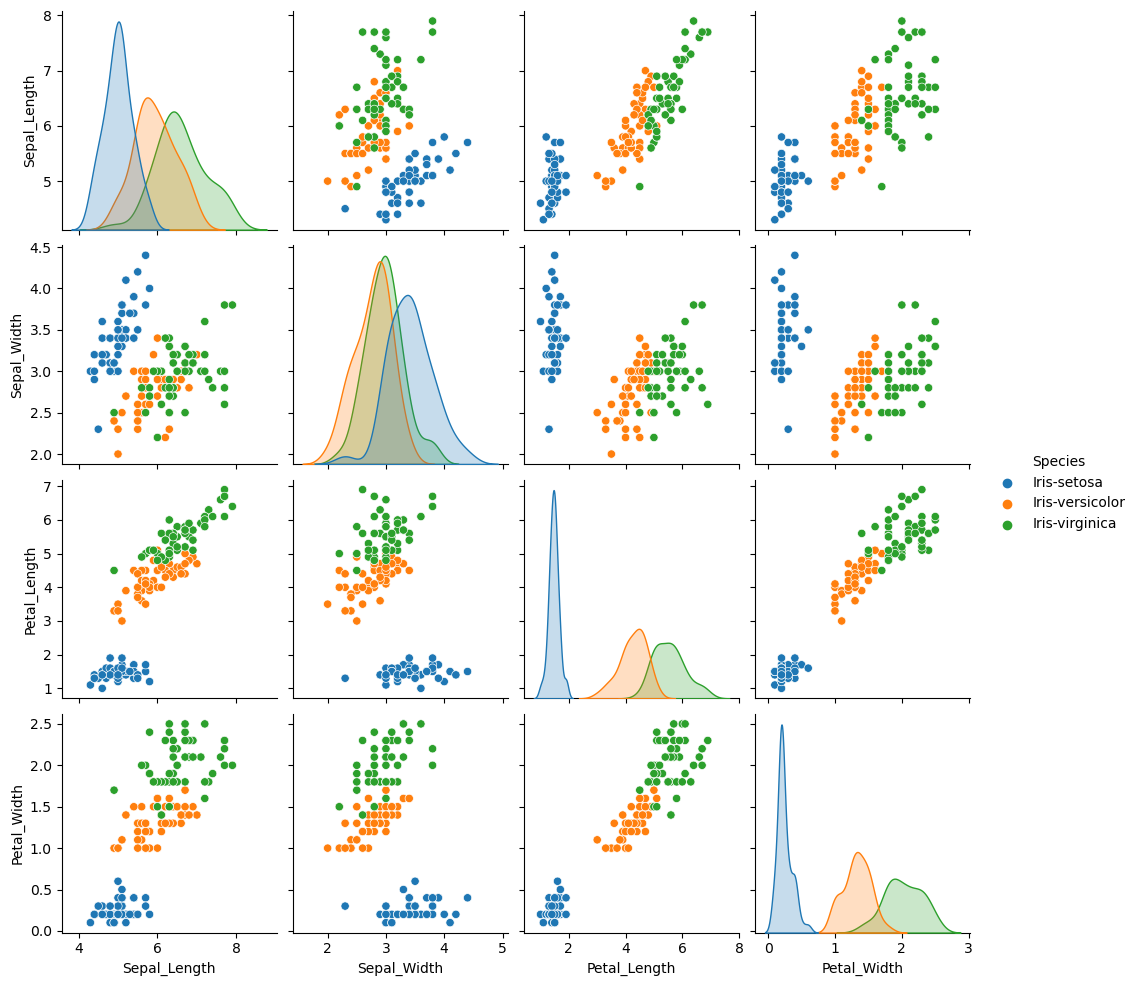

In [82]:
plt.figure(figsize=(6,6))
sns.pairplot(df,hue="Species")
plt.show()

Model

In [83]:
X=df.drop("Species",axis=1)
Y=df["Species"] # target var

In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=20)

In [85]:
# standardized X
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [86]:
X_test=scaler.fit_transform(X_test)

Logistic Regression Model

In [87]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [88]:
# Prediction
y_pred = model.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [89]:
# Training acc
train_accuracy=model.score(X_train,Y_train)
print("The training accuracy is",round(train_accuracy,2))

The training accuracy is 0.96


In [90]:
# Test acc
test_accuracy=model.score(X_test,Y_test)
print("The testing accuracy is",round(test_accuracy,2))

The testing accuracy is 0.93


Evaluate metrics for the model
- Accuracy: the fraction of predictions our model got right
- Precision: the ratio of correctly predicted positive classes to all predicted positive classes
- Recall:  ratio of correctly predicted positive classes to all actually existing positive classes
- F1 Score: (precision * recall) / (precision + recall)
- Confusion Matrix: table layout that allows visualization of the performance of the algorithm

In [91]:
def evaluation (y_test, pred):
  print("Accuracy Score:",accuracy_score(y_test, pred)) 
  print("Precision:",precision_score(y_test, pred, average=None))
  print("Recall:",recall_score(y_test, pred, average=None))
  print("f1_score:",f1_score(y_test, pred, average=None))
  print("Classification report:\n",classification_report(y_test, pred))
  print("\n")
  print("Confusion Matrix")
  ConfusionMatrixDisplay.from_predictions(y_test, pred)

Accuracy Score: 0.9333333333333333
Precision: [1.         0.84615385 1.        ]
Recall: [1.         1.         0.81818182]
f1_score: [1.         0.91666667 0.9       ]
Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



Confusion Matrix


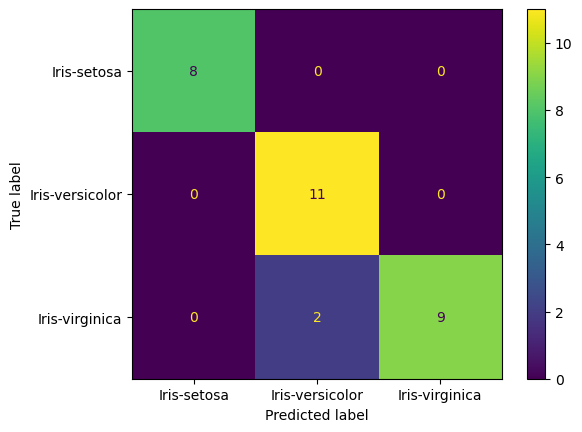

In [92]:
evaluation (Y_test, y_pred)

In [93]:
root = Tk()
root.geometry("1200x800") ; root.resizable(0,0) ; root.title("Iris Species Classifier") ; root.configure(background="white")
#df = pd.read_csv(r"C://Users//vicky//Downloads//Iris.csv",index_col=0)
label = LabelEncoder()
df["Species"] = label.fit_transform(df["Species"])

x=df.drop("Species",axis=1)
y=df["Species"]
model = LogisticRegression()
model.fit(x,y)

# input variables
sl = DoubleVar()
sw = DoubleVar()
pl = DoubleVar()
pw = DoubleVar()
z = StringVar()

# function to show
def show():
    a = sl.get()
    b = sw.get()
    c = pl.get()
    d = pw.get()
    e = [[a,b,c,d]]
    prediction = model.predict(e)[0]
    if prediction == 0:
        z.set("Iris Setosa")
        load = Image.open("C://Users//vicky//Downloads//IrisSetosa2.jpg")
        render = ImageTk.PhotoImage(load)
        img = Label(root, image=render)
        img.image = render
        img.place(x=650, y=200)
    elif prediction == 1:
        z.set("Iris Versicolor")
        load = Image.open("C:\\Users\\vicky\\Downloads\\IrisVersicolor.jpg")
        render = ImageTk.PhotoImage(load)
        img = Label(root, image=render)
        img.image = render
        img.place(x=650, y=200)
    else:
        z.set("Iris Virginica")
        load = Image.open("C://Users//vicky//Downloads//IrisVirginica2.jpg")
        render = ImageTk.PhotoImage(load)
        img = Label(root, image=render)
        img.image = render
        img.place(x=650, y=200)
        

l0 = Label(root,text="Iris Classification",font=("Roboto",25,UNDERLINE),fg="sienna",background="white")
l0.place(x=500,y=40)

l1 = Label(root,text="Sepal Length (cm):",font=("Roboto",20,"bold"),fg="dark green",background="white")
l1.place(x=60,y=182)
e1 = Entry(root,font=("Roboto",15),width="10",textvariable=sl,justify="center")
e1.place(x=350,y=188)

l2 = Label(root,text="Sepal Width (cm):",font=("Roboto",20,"bold"),fg="dark green",background="white")
l2.place(x=60,y=252)
e2 = Entry(root,font=("Roboto",15),width="10",textvariable=sw,justify="center")
e2.place(x=350,y=258)

l3 = Label(root,text="Petal Length (cm):",font=("Roboto","20","bold"),fg="dark green",background="white")
l3.place(x=60,y=322)
e3 = Entry(root,font=("Roboto",15),width="10",textvariable=pl,justify="center")
e3.place(x=350,y=328)

l4 = Label(root,text="Petal Width (cm):",font=("Roboto","20","bold"),fg="dark green",background="white")
l4.place(x=60,y=392)
e4 = Entry(root,font=("Roboto",15),width="10",textvariable=pw,justify="center")
e4.place(x=350,y=398)

b1 = Button(root,text="Predict Iris",bg="red",fg="white",font=("Roboto",20),relief="raised",command=show)
b1.place(x=140,y=650,height=50,width=200)

e5 = Entry(root,font=("Roboto",20),width="15",textvariable=z,justify="center",relief="solid",bg="black",fg="purple")
e5.place(x=700,y=650,height=50,width=400)

root.mainloop()

C:\Users\vicky\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
